# Линейная регрессия в PyTorch

## Проверка работоспособности PyTorch и доступности CUDA

In [1]:
import torch

In [32]:
torch.cuda.is_available()

True

In [3]:
n_cudas = torch.cuda.device_count()
for i in range(n_cudas):
  print(torch.cuda.get_device_name(i))

GeForce RTX 2080 SUPER


In [5]:
x = torch.randn(3, requires_grad=True)
print(x)

tensor([-0.6457,  0.5841, -1.1232], requires_grad=True)


## Реализация линейной регрессии

In [31]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### Подготовка данных

In [67]:
# генерация датасета для задачи регрессии
X_numpy, Y_numpy = datasets.make_regression(n_samples=50, n_features=1, noise=20, random_state=1)

In [68]:
# превращение массивов numpy в тензоры pytorch
X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))

In [69]:
# преобразование размерностей
Y = Y.view(Y.shape[0], 1)
Y.shape

torch.Size([50, 1])

### Определение модели

In [70]:
input_size = 1
output_size = 1

model = nn.Linear(input_size, output_size)

### Задание функции потерь и оптимизатора

In [71]:
learning_rate = 0.01
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

### Цикл обучения

In [72]:
num_epochs = 100
for epoch in range(num_epochs):
    # прямой проход
    Y_pred = model(X)
    
    # потери
    loss = loss_fn(Y_pred, Y)
    
    # обратный проход (вычисление градиентов)
    loss.backward()
    
    # обновление параметров
    optimizer.step()
    
    # обнуление градиентов 
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch {epoch+1}: loss = {loss.item():.3f}')

epoch 10: loss = 5225.394
epoch 20: loss = 3661.216
epoch 30: loss = 2590.504
epoch 40: loss = 1857.517
epoch 50: loss = 1355.687
epoch 60: loss = 1012.088
epoch 70: loss = 776.809
epoch 80: loss = 615.690
epoch 90: loss = 505.348
epoch 100: loss = 429.774


### Вывод предсказанных значений на график

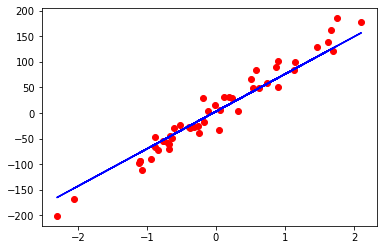

In [73]:
predicted = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()